In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from f1_utils import cq500_f1

root_dir = "../../"

data_dir = os.path.join(root_dir, "data")
cq500_dir = os.path.join(data_dir, "CQ500")
bhx_dir = os.path.join(data_dir, "BHX")
image_dir = os.path.join(cq500_dir, "images")
figure_dir = os.path.join(root_dir, "figures", "image_level")
os.makedirs(figure_dir, exist_ok=True)

sns.set_theme()
sns.set_context("paper", font_scale=1.5)

In [2]:
if not os.path.exists(os.path.join(cq500_dir, "explanations", "image_level_f1")):
    cq500_f1()
f1_df = pd.read_pickle(os.path.join(cq500_dir, "explanations", "image_level_f1"))

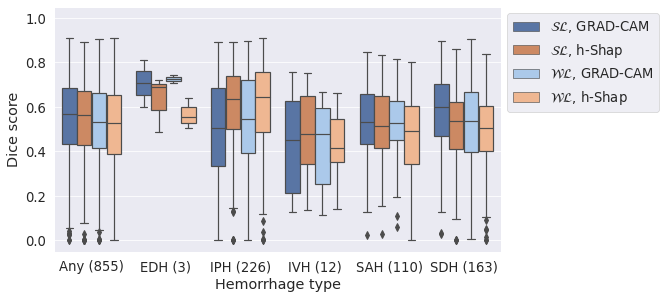

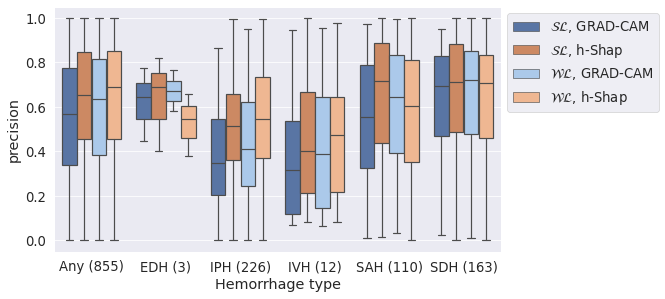

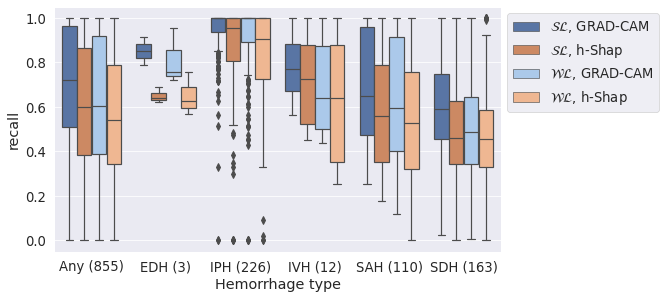

In [3]:
from scipy.stats import iqr

df = f1_df.explode("hemorrhage_types", ignore_index=True)

for metric, name in [
    ("f1", "Dice score"),
    ("precision", "precision"),
    ("recall", "recall"),
]:
    _, ax = plt.subplots(figsize=(16 / 2, 9 / 2))
    ax = sns.boxplot(
        data=df.explode("hemorrhage_types", ignore_index=True),
        x="hemorrhage_types",
        y=metric,
        hue="model_explainer",
        ax=ax,
        palette=sns.color_palette()[:2] + sns.color_palette("pastel")[:2],
        order=sorted(pd.unique(df["hemorrhage_types"])),
    )
    ax.set_xlabel("Hemorrhage type")
    ax.set_ylabel(name)
    ax.set_ylim(-0.05, 1.05)
    xticklabels = ax.get_xticklabels()
    for tick in xticklabels:
        hem_type = tick.get_text()
        tick.set_text(
            f"{hem_type} ({len(df[df['hemorrhage_types'] == hem_type]) // 4})"
        )
    ax.set_xticklabels(xticklabels)
    ax.legend(title="", loc="upper left", bbox_to_anchor=(1, 1))

    plt.savefig(
        os.path.join(figure_dir, f"CQ500_{metric}_ICH_type.jpg"), bbox_inches="tight"
    )
    plt.savefig(
        os.path.join(figure_dir, f"CQ500_{metric}_ICH_type.pdf"), bbox_inches="tight"
    )
    plt.show()

In [4]:
median_iqr_df = df.groupby(["hemorrhage_types", "model_explainer"]).agg(
    {"f1": ["median", iqr]}
)
median_iqr_df

f1          
                                             median       iqr
hemorrhage_types model_explainer                             
Any              $\mathcal{SL}$, GRAD-CAM  0.567875  0.252020
                 $\mathcal{SL}$, h-Shap    0.561772  0.241034
                 $\mathcal{WL}$, GRAD-CAM  0.530232  0.247806
                 $\mathcal{WL}$, h-Shap    0.529886  0.264191
EDH              $\mathcal{SL}$, GRAD-CAM  0.708418  0.105322
                 $\mathcal{SL}$, h-Shap    0.688600  0.115706
                 $\mathcal{WL}$, GRAD-CAM  0.723584  0.017021
                 $\mathcal{WL}$, h-Shap    0.555661  0.069213
IPH              $\mathcal{SL}$, GRAD-CAM  0.506027  0.348760
                 $\mathcal{SL}$, h-Shap    0.633753  0.237424
                 $\mathcal{WL}$, GRAD-CAM  0.547890  0.325201
                 $\mathcal{WL}$, h-Shap    0.646573  0.266117
IVH              $\mathcal{SL}$, GRAD-CAM  0.451093  0.413110
                 $\mathcal{SL}$, h-Shap    0.477683  0.308750
                 $\mathcal{WL}$, GRAD-CAM  0.480130  0.343061
                 $\mathcal{WL}$, h-Shap    0.416985  0.193062
SAH              $\mathcal{SL}$, GRAD-CAM  0.533800  0.226398
                 $\mathcal{SL}$, h-Shap    0.514188  0.236794
                 $\mathcal{WL}$, GRAD-CAM  0.526082  0.176790
                 $\mathcal{WL}$, h-Shap    0.493427  0.259827
SDH              $\mathcal{SL}$, GRAD-CAM  0.599908  0.232776
                 $\mathcal{SL}$, h-Shap    0.535928  0.211640
                 $\mathcal{WL}$, GRAD-CAM  0.537899  0.268666
                 $\mathcal{WL}$, h-Shap    0.507383  0.203903

In [5]:
worst_df = df.loc[df.groupby(["hemorrhage_types", "model_explainer"])["f1"].idxmin()]

for _, data in worst_df.iterrows():
    print(
        data["hemorrhage_types"],
        data["model"],
        data["explainer"],
        data["sop_id"],
        data["f1"],
    )

Any $\mathcal{SL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521714090.1985862 0.0
Any $\mathcal{SL}$ h-Shap 1.2.276.0.7230010.3.1.4.296485376.1.1521714090.1985862 0.0
Any $\mathcal{WL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521714568.2079737 0.0
Any $\mathcal{WL}$ h-Shap 1.2.276.0.7230010.3.1.4.296485376.1.1521714090.1985862 0.0
EDH $\mathcal{SL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521713546.1839427 0.6014705882352942
EDH $\mathcal{SL}$ h-Shap 1.2.276.0.7230010.3.1.4.296485376.1.1521713546.1839427 0.48790654308122633
EDH $\mathcal{WL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521713546.1839389 0.7097735645982531
EDH $\mathcal{WL}$ h-Shap 1.2.276.0.7230010.3.1.4.296485376.1.1521713546.1839427 0.503553016580744
IPH $\mathcal{SL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521714090.1985862 0.0
IPH $\mathcal{SL}$ h-Shap 1.2.276.0.7230010.3.1.4.296485376.1.1521714090.1985862 0.0
IPH $\mathcal{WL}$ GRAD-CAM 1.2.276.0.7230010.3.1.4.296485376.1.1521714568.20797